In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
gra = pd.read_csv('datasets/GRA_DataLITH.csv')

/tmp/ipykernel_3237352/3578384810.py:1: DtypeWarning: Columns (0,5,6,16,17,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  gra = pd.read_csv('datasets/GRA_DataLITH.csv')


In [3]:
gra.columns

Index(['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W', 'Offset (cm)',
       'Depth CSF-A (m)', 'Depth CSF-B (m)', 'Bulk density (GRA)',
       'Timestamp (UTC)', 'Instrument', 'Instrument group', 'Text ID',
       'Test No.', 'Comments', 'Sample comments', 'Test comments',
       'Result comments', 'Prefix', 'Principal', 'Suffix', 'Full Lithology',
       'Simplified Lithology', 'Lithology Type', 'Degree of Consolidation',
       'Lithology Subtype', 'Expanded Core Type', 'Latitude (DD)',
       'Longitude (DD)', 'Water Depth (mbsl)'],
      dtype='object')

In [4]:
gra.dtypes

Exp                         object
Site                        object
Hole                        object
Core                         int64
Type                        object
Sect                        object
A/W                         object
Offset (cm)                float64
Depth CSF-A (m)            float64
Depth CSF-B (m)            float64
Bulk density (GRA)         float64
Timestamp (UTC)             object
Instrument                  object
Instrument group            object
Text ID                     object
Test No.                     int64
Comments                    object
Sample comments             object
Test comments              float64
Result comments             object
Prefix                      object
Principal                   object
Suffix                      object
Full Lithology              object
Simplified Lithology        object
Lithology Type              object
Degree of Consolidation     object
Lithology Subtype           object
Expanded Core Type  

In [5]:
gra['id'] = gra.Exp.astype(str) + gra.Site.astype(str) + gra.Hole.astype(str)

<Axes: >

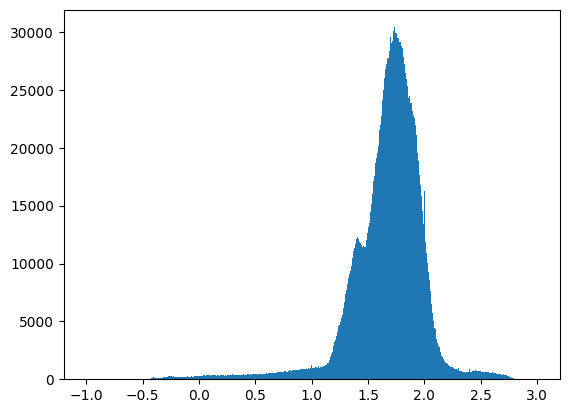

In [20]:
gra['Bulk density (GRA)'].hist(bins=np.linspace(-1, 3, 1000), grid=False)

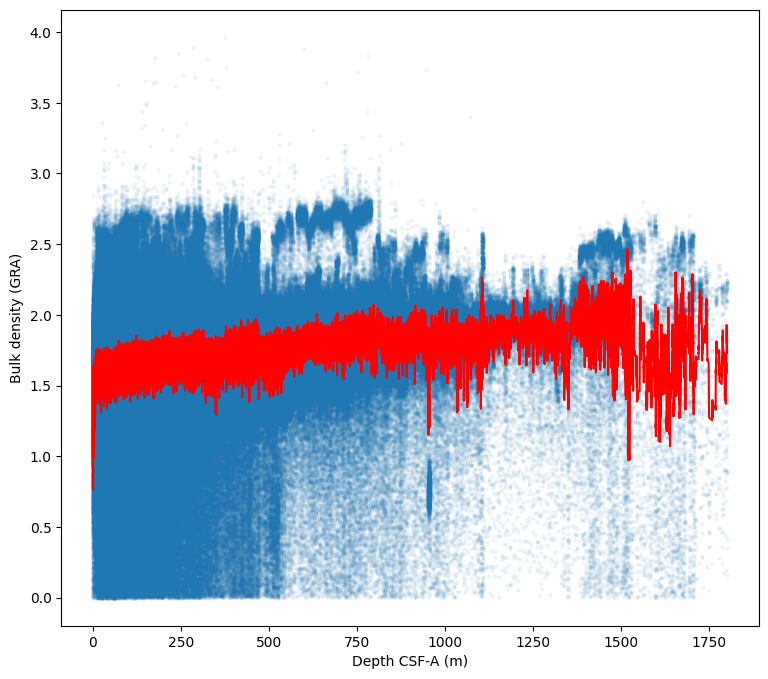

In [35]:
fig, ax = plt.subplots(figsize=(9, 8))
gra[gra['Bulk density (GRA)'].between(0, 4)].plot.scatter(x='Depth CSF-A (m)', y='Bulk density (GRA)', ax=ax, marker='.', alpha=0.05)
roll = gra[gra['Bulk density (GRA)'].between(0, 4)][['Depth CSF-A (m)', 'Bulk density (GRA)']].sort_values('Depth CSF-A (m)').rolling(window=50, on='Depth CSF-A (m)').mean()#.plot('Bulk density (GRA)')
ax.plot(roll['Depth CSF-A (m)'], roll['Bulk density (GRA)'], color='red')

In [37]:
gra.columns

Index(['Exp', 'Site', 'Hole', 'Core', 'Type', 'Sect', 'A/W', 'Offset (cm)',
       'Depth CSF-A (m)', 'Depth CSF-B (m)', 'Bulk density (GRA)',
       'Timestamp (UTC)', 'Instrument', 'Instrument group', 'Text ID',
       'Test No.', 'Comments', 'Sample comments', 'Test comments',
       'Result comments', 'Prefix', 'Principal', 'Suffix', 'Full Lithology',
       'Simplified Lithology', 'Lithology Type', 'Degree of Consolidation',
       'Lithology Subtype', 'Expanded Core Type', 'Latitude (DD)',
       'Longitude (DD)', 'Water Depth (mbsl)', 'id'],
      dtype='object')

In [44]:
gra_oli_serp_carb = gra[gra['Full Lithology'].str.contains('olivine') | gra['Full Lithology'].str.contains('serpent') | gra['Full Lithology'].str.contains('carbon')]

In [47]:
def scatter_bulk(df):
    fig, ax = plt.subplots(figsize=(9, 8))
    df[df['Bulk density (GRA)'].between(0, 4)].plot.scatter(x='Depth CSF-A (m)', y='Bulk density (GRA)', ax=ax, marker='.', alpha=0.05)
    # roll = df[df['Bulk density (GRA)'].between(0, 4)][['Depth CSF-A (m)', 'Bulk density (GRA)']].sort_values('Depth CSF-A (m)').rolling(window=50, on='Depth CSF-A (m)').mean()#.plot('Bulk density (GRA)')
    # ax.plot(roll['Depth CSF-A (m)'], roll['Bulk density (GRA)'], color='red')
    return fig, ax

(<Figure size 900x800 with 1 Axes>,
 <Axes: xlabel='Depth CSF-A (m)', ylabel='Bulk density (GRA)'>)

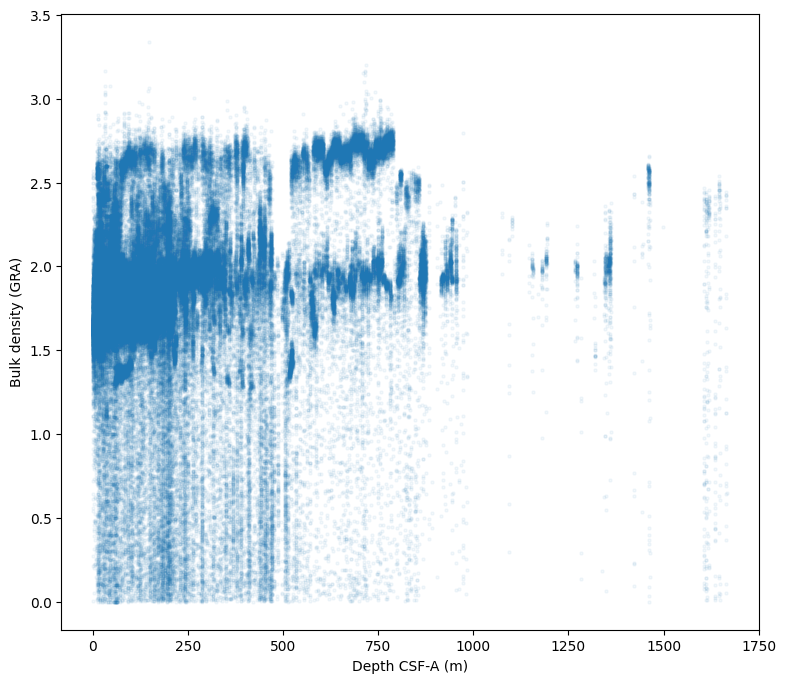

In [48]:
scatter_bulk(gra_oli_serp_carb)

In [50]:
gra_oli_serp_carb['id'] = gra_oli_serp_carb['Site'].astype(str) + gra_oli_serp_carb['Hole'].astype(str)

/tmp/ipykernel_3237352/1518557201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gra_oli_serp_carb['id'] = gra_oli_serp_carb['Site'].astype(str) + gra_oli_serp_carb['Hole'].astype(str)


<Axes: xlabel='id'>

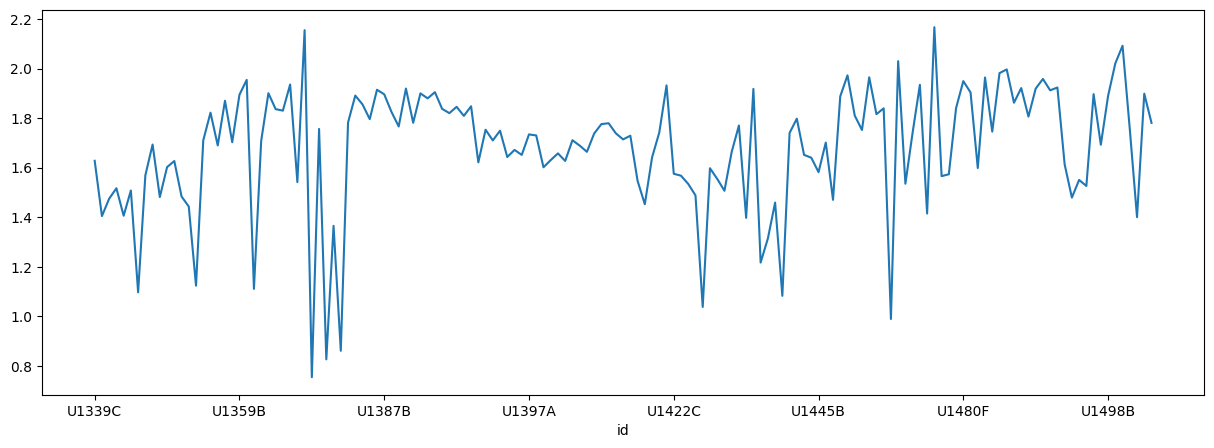

In [54]:
gra_oli_serp_carb.groupby('id')['Bulk density (GRA)'].mean().plot(figsize=(15, 5))